In [3]:
!kaggle datasets download jacksoncrow/stock-market-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 98% 513M/522M [00:06<00:00, 59.0MB/s]
100% 522M/522M [00:06<00:00, 90.6MB/s]


In [4]:
!unzip stock-market-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: stocks/CAPE.csv         
  inflating: stocks/CAPL.csv         
  inflating: stocks/CAPR.csv         
  inflating: stocks/CAR.csv          
  inflating: stocks/CARA.csv         
  inflating: stocks/CARE.csv         
  inflating: stocks/CARG.csv         
  inflating: stocks/CARO.csv         
  inflating: stocks/CARR#.csv        
  inflating: stocks/CARS.csv         
  inflating: stocks/CARV.csv         
  inflating: stocks/CASA.csv         
  inflating: stocks/CASH.csv         
  inflating: stocks/CASI.csv         
  inflating: stocks/CASS.csv         
  inflating: stocks/CASY.csv         
  inflating: stocks/CAT.csv          
  inflating: stocks/CATB.csv         
  inflating: stocks/CATC.csv         
  inflating: stocks/CATM.csv         
  inflating: stocks/CATO.csv         
  inflating: stocks/CATS.csv         
  inflating: stocks/CATY.csv         
  inflating: stocks/CB.csv           
  inflating: stocks/CBAN.csv         

In [9]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = "/content/symbols_valid_meta.csv"  # Replace with your file path
stock_data = pd.read_csv(file_path)

# Display the structure of the dataset
print("Dataset Info:")
print(stock_data.info())

# Display the first few rows
print("\nFirst 5 rows:")
print(stock_data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(stock_data.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(stock_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), object(11)
memory usage: 754.7+ KB
None

First 5 rows:
  Nasdaq Traded Symbol                                      Security Name  \
0             Y      A            Agilent Technologies, Inc. Common S

<ipython-input-12-124b56ebb823>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stock_data, x=col, palette='Set2')
<ipython-input-12-124b56ebb823>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stock_data, x=col, palette='Set2')
<ipython-input-12-124b56ebb823>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stock_data, x=col, palette='Set2')
<ipython-input-12-124b56ebb823>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

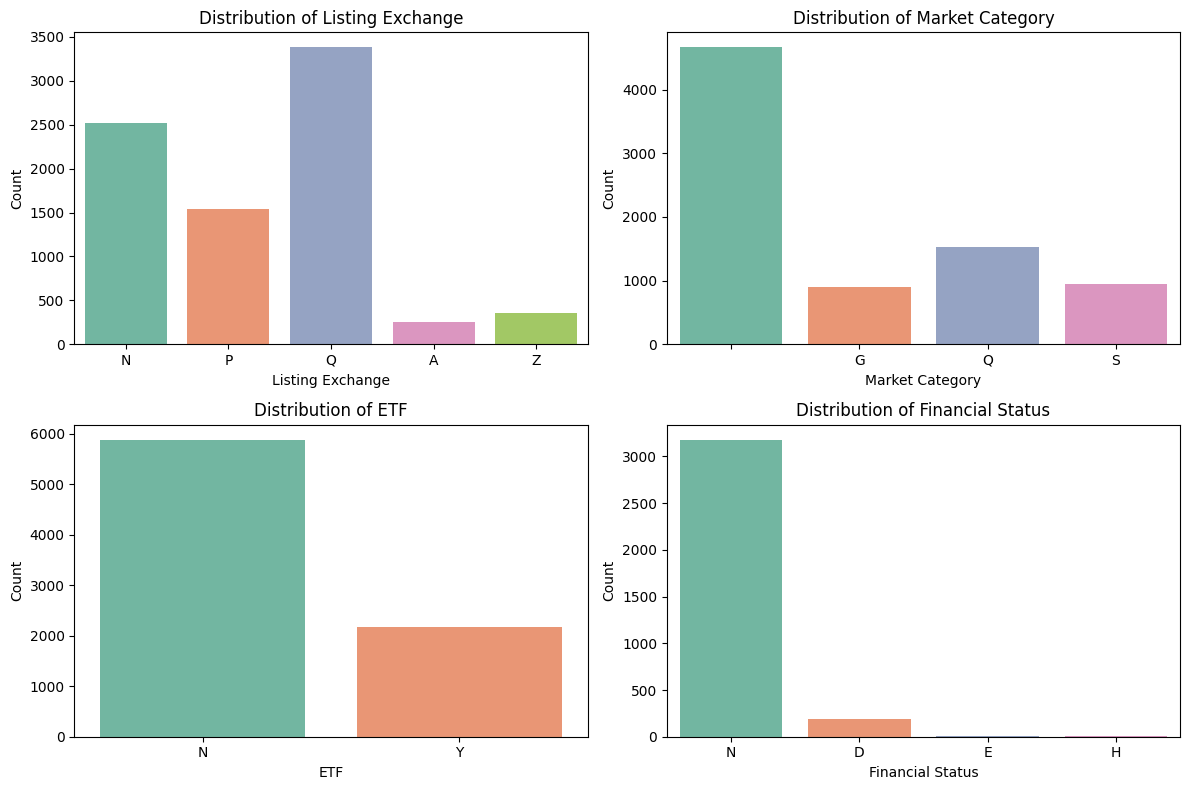


Unique values in categorical columns:
Listing Exchange: 5 unique values
Market Category: 4 unique values
ETF: 2 unique values
Financial Status: 4 unique values


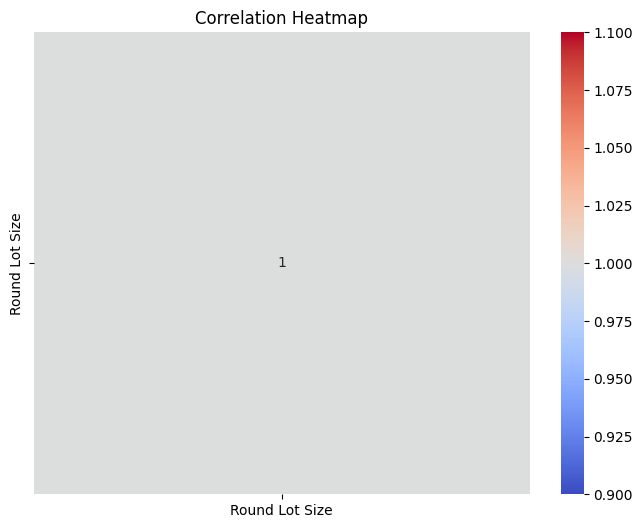

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categorical columns
categorical_columns = ['Listing Exchange', 'Market Category', 'ETF', 'Financial Status']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=stock_data, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {stock_data[col].nunique()} unique values")

# If there are any numerical columns, check their correlation (e.g., Nasdaq Traded, Round Lot Size)
numerical_columns = stock_data.select_dtypes(include=[np.number]).columns  # Update if other numerical columns exist

if len(numerical_columns) > 0:
    plt.figure(figsize=(8, 6))
    correlation_matrix = stock_data[numerical_columns].corr()  # Calculate correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns found to compute correlation.")


In [13]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(stock_data.isnull().sum())

# Option 1: Drop rows with missing values (if necessary)
# stock_data = stock_data.dropna()

# Option 2: Fill missing values with a placeholder (e.g., 'Unknown' for categorical columns)
# Fill missing values in categorical columns with a placeholder
stock_data['Market Category'].fillna('Unknown', inplace=True)
stock_data['ETF'].fillna('Unknown', inplace=True)
stock_data['Listing Exchange'].fillna('Unknown', inplace=True)
stock_data['Financial Status'].fillna('Unknown', inplace=True)

# Verify if missing values are handled
print("\nMissing values after cleaning:")
print(stock_data.isnull().sum())


Missing values in each column:
Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF                    0
Round Lot Size         0
Test Issue             0
Financial Status    4666
CQS Symbol          3383
NASDAQ Symbol          0
NextShares             0
dtype: int64

Missing values after cleaning:
Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF                    0
Round Lot Size         0
Test Issue             0
Financial Status       0
CQS Symbol          3383
NASDAQ Symbol          0
NextShares             0
dtype: int64


<ipython-input-13-ccd42900d92d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data['Market Category'].fillna('Unknown', inplace=True)
<ipython-input-13-ccd42900d92d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [14]:
# One-Hot Encoding for categorical columns
categorical_columns = ['Market Category', 'ETF', 'Listing Exchange', 'Financial Status']

# Perform one-hot encoding
stock_data_encoded = pd.get_dummies(stock_data, columns=categorical_columns, drop_first=True)

# Display the updated dataset with encoded columns
print("Data after One-Hot Encoding:")
print(stock_data_encoded.head())

Data after One-Hot Encoding:
  Nasdaq Traded Symbol                                      Security Name  \
0             Y      A            Agilent Technologies, Inc. Common Stock   
1             Y     AA                    Alcoa Corporation Common Stock    
2             Y   AAAU                       Perth Mint Physical Gold ETF   
3             Y   AACG  ATA Creativity Global - American Depositary Sh...   
4             Y   AADR                AdvisorShares Dorsey Wright ADR ETF   

   Round Lot Size Test Issue CQS Symbol NASDAQ Symbol NextShares  \
0           100.0          N          A             A          N   
1           100.0          N         AA            AA          N   
2           100.0          N       AAAU          AAAU          N   
3           100.0          N        NaN          AACG          N   
4           100.0          N       AADR          AADR          N   

   Market Category_G  Market Category_Q  Market Category_S  ETF_Y  \
0              False          

In [15]:
# Drop irrelevant columns (e.g., Symbol, Security Name)
stock_data_encoded = stock_data_encoded.drop(columns=['Symbol', 'Security Name'])

# Display the dataset after feature selection
print("Data after Feature Selection:")
print(stock_data_encoded.head())

Data after Feature Selection:
  Nasdaq Traded  Round Lot Size Test Issue CQS Symbol NASDAQ Symbol  \
0             Y           100.0          N          A             A   
1             Y           100.0          N         AA            AA   
2             Y           100.0          N       AAAU          AAAU   
3             Y           100.0          N        NaN          AACG   
4             Y           100.0          N       AADR          AADR   

  NextShares  Market Category_G  Market Category_Q  Market Category_S  ETF_Y  \
0          N              False              False              False  False   
1          N              False              False              False  False   
2          N              False              False              False   True   
3          N               True              False              False  False   
4          N              False              False              False   True   

   Listing Exchange_N  Listing Exchange_P  Listing Exchange_Q 